<a href="https://colab.research.google.com/github/irinaachikhmina/Hi-C/blob/main/Hi_C_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HiC
## Ира Макарова
## декабрь, 2022

Read the https://pairtools.readthedocs.io/en/latest/ and https://cooler.readthedocs.io/en/latest/index.html
for more information

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()


⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:37
🔁 Restarting kernel...


In [ ]:
%%bash
pip install numpy==1.23.3
pip install numpy pysam cython
pip install pairtools
conda install -c bioconda bwa
conda install -c bioconda samtools
pip install cooler
pip  install pysam


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.23.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 86.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 945.6/945.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 kB 15.8 MB/s eta 0:00:00
  Created wheel for pairtools: fi

In [ ]:
import pysam

In [ ]:
%%bash
pip install matplotlib==3.1.3

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import bioframe

In [ ]:
import cooler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/NGS/09.hic

/content/drive/MyDrive/NGS/09.hic


PART I: read mapping and Hi-C map creation

In [ ]:
# Индексируем референсный геном
! bwa index PAO1_inverted_727667_4788573.fa

[bwa_index] Pack FASTA... 0.09 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 3.33 seconds elapse.
[bwa_index] Update BWT... 0.05 sec
[bwa_index] Pack forward-only FASTA... 0.04 sec
[bwa_index] Construct SA from BWT and Occ... 1.46 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index PAO1_inverted_727667_4788573.fa
[main] Real time: 6.711 sec; CPU: 4.988 sec


In [ ]:
# Картируем
! bwa mem -t 5 -SP PAO1_inverted_727667_4788573.fa HiC_PAO1_R1_001_cutadapt_cut_cor.fastq.gz  HiC_PAO1_R2_001_cutadapt_cut_cor.fastq.gz | samtools view -Sb  > HiC_PAO.bam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 345426 sequences (50000131 bp)...
[M::process] read 345010 sequences (50000016 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (824, 120814, 1149, 785)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (844, 2725, 6070)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 16522)
[M::mem_pestat] mean and std.dev: (3612.69, 3002.60)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 21748)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (136, 190, 270)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 538)
[M::mem_pestat] mean and std.dev: (207.90, 98.90)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 672)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50

In [ ]:
! pip install ipykernel

In [ ]:
# Парсинг
%%bash
 pairtools parse -o PAO.pairs.gz -c PAO1_inverted_727667_4788573.chrom.sizes --drop-sam --drop-seq --add-columns mapq HiC_PAO.bam

[E::idx_find_and_load] Could not retrieve index file for 'HiC_PAO.bam'


In [ ]:
# Сортируем
%%bash
pairtools sort --nproc 5 -o  PAO.sorted.pairs.gz  PAO.pairs.gz

tcmalloc: large alloc 2147491840 bytes == 0x55d202dda000 @  0x7fef4fcc41e7 0x55d201206718 0x55d2012055a1 0x7fef4f6a2c87 0x55d20120602a


In [ ]:
#let's look at the info stored in the file columns:
! gzip -dc PAO.sorted.pairs.gz| grep "#" | tail -n 5

#samheader: @SQ	SN:chr1	LN:6264402
#samheader: @PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem -t 5 -SP PAO1_inverted_727667_4788573.fa HiC_PAO1_R1_001_cutadapt_cut_cor.fastq.gz HiC_PAO1_R2_001_cutadapt_cut_cor.fastq.gz
#samheader: @PG	ID:pairtools_parse	PN:pairtools_parse	CL:/usr/local/bin/pairtools parse -o PAO.pairs.gz -c PAO1_inverted_727667_4788573.chrom.sizes --drop-sam --drop-seq --add-columns mapq HiC_PAO.bam	PP:bwa	VN:1.0.2
#samheader: @PG	ID:pairtools_sort	PN:pairtools_sort	CL:/usr/local/bin/pairtools sort --nproc 5 -o PAO.sorted.pairs.gz PAO.pairs.gz	PP:pairtools_parse	VN:1.0.2
#columns: readID chrom1 pos1 chrom2 pos2 strand1 strand2 pair_type mapq1 mapq2


In [ ]:
! gzip -dc PAO.sorted.pairs.gz| grep -v "#" | head -n 5

K00370:83:HGKHNBBXY:4:1101:18477:1332	!	0	!	0	-	-	MM	0	0
K00370:83:HGKHNBBXY:4:1101:5477:1349	!	0	!	0	-	-	MM	0	0
K00370:83:HGKHNBBXY:4:1101:20029:1455	!	0	!	0	-	-	MM	0	0
K00370:83:HGKHNBBXY:4:1101:18639:1508	!	0	!	0	-	-	MM	0	0
K00370:83:HGKHNBBXY:4:1101:25164:1560	!	0	!	0	-	-	MM	0	0


In [ ]:
# Удаляем дубликаты
%%bash
pairtools dedup \
    --max-mismatch 3 \
    --mark-dups \
    --output \
        >( pairtools split \
            --output-pairs PAO.nodups.pairs.gz \
            --output-sam PAO.nodups.bam \
         ) \
    --output-unmapped \
        >( pairtools split \
            --output-pairs PAO.unmapped.pairs.gz \
            --output-sam PAO.unmapped.bam \
         ) \
    --output-dups \
        >( pairtools split \
            --output-pairs PAO.dups.pairs.gz \
            --output-sam PAO.dups.bam \
         ) \
    --output-stats PAO.dedup.stats \
      PAO.sorted.pairs.gz

In [ ]:
! cooler cload pairs -c1 2 -p1 3 -c2 4 -p2 5 PAO1_inverted_727667_4788573.chrom.sizes:1000 PAO.nodups.pairs.gz PAO.1000.cool

  is_cat = pd.api.types.is_categorical(bins["chrom"])

INFO:cooler.create:Writing chunk 0: /content/drive/MyDrive/NGS/09.hic/tmpqdpjm35q.multi.cool::0
INFO:cooler.create:Creating cooler at "/content/drive/MyDrive/NGS/09.hic/tmpqdpjm35q.multi.cool::/0"
INFO:cooler.create:Writing chroms
INFO:cooler.create:Writing bins
INFO:cooler.create:Writing pixels
INFO:cooler.create:Writing indexes
INFO:cooler.create:Writing info
INFO:cooler.create:Merging into PAO.1000.cool
INFO:cooler.create:Creating cooler at "PAO.1000.cool::/"
INFO:cooler.create:Writing chroms
INFO:cooler.create:Writing bins
INFO:cooler.create:Writing pixels
INFO:cooler.reduce:nnzs: [2498757]
INFO:cooler.reduce:current: [2498757]
INFO:cooler.create:Writing indexes
INFO:cooler.create:Writing info


In [ ]:
# Балансируем и задаем разрешение
! cooler zoomify --balance -r 1000,2000 PAO.1000.cool

INFO:cooler.cli.zoomify:Recursively aggregating "PAO.1000.cool"
INFO:cooler.cli.zoomify:Writing to "PAO.1000.mcool"
INFO:cooler.reduce:Copying base matrices and producing 2 new zoom levels.
INFO:cooler.reduce:Bin size: 1000
INFO:cooler.reduce:Aggregating from 1000 to 2000.
  is_cat = pd.api.types.is_categorical(bins["chrom"])

INFO:cooler.create:Creating cooler at "PAO.1000.mcool::/resolutions/2000"
INFO:cooler.create:Writing chroms
INFO:cooler.create:Writing bins
INFO:cooler.create:Writing pixels
INFO:cooler.reduce:0 2498757
INFO:cooler.create:Writing indexes
INFO:cooler.create:Writing info
INFO:cooler.cli.zoomify:Balancing zoom level with bin size 1000
INFO:cooler.cli.balance:Balancing "PAO.1000.mcool::resolutions/1000"
INFO:cooler.balance:variance is 210871.72497149918
INFO:cooler.balance:variance is 17286.600374133683
INFO:cooler.balance:variance is 2787.9705084299876
INFO:cooler.balance:variance is 516.9796150640451
INFO:cooler.balance:variance is 92.95629824327601
INFO:cooler.bal

In [ ]:
# Балансируем и задаем разрешение
! cooler zoomify --balance -r 2000 PAO.1000.cool

INFO:cooler.cli.zoomify:Recursively aggregating "PAO.1000.cool"
INFO:cooler.cli.zoomify:Writing to "PAO.1000.mcool"
INFO:cooler.reduce:Copying base matrices and producing 2 new zoom levels.
INFO:cooler.reduce:Bin size: 1000
INFO:cooler.reduce:Aggregating from 1000 to 2000.
  is_cat = pd.api.types.is_categorical(bins["chrom"])

INFO:cooler.create:Creating cooler at "PAO.1000.mcool::/resolutions/2000"
INFO:cooler.create:Writing chroms
INFO:cooler.create:Writing bins
INFO:cooler.create:Writing pixels
INFO:cooler.reduce:0 2498757
INFO:cooler.create:Writing indexes
INFO:cooler.create:Writing info
INFO:cooler.cli.zoomify:Balancing zoom level with bin size 2000
INFO:cooler.cli.balance:Balancing "PAO.1000.mcool::resolutions/2000"
INFO:cooler.balance:variance is 635132.0700565857
INFO:cooler.balance:variance is 58103.269691303845
INFO:cooler.balance:variance is 8648.54422644601
INFO:cooler.balance:variance is 1459.2170573326307
INFO:cooler.balance:variance is 239.9166138050484
INFO:cooler.balan

In [ ]:
c=cooler.Cooler('PAO.1000.mcool::resolutions/2000')

In [ ]:
c.info

{'bin-size': 2000,
 'bin-type': 'fixed',
 'creation-date': '2022-12-25T21:46:05.343695',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/open2c/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.11',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 3133,
 'nchroms': 1,
 'nnz': 1838467,
 'storage-mode': 'symmetric-upper',
 'sum': 4697591}

In [ ]:
# Корректированная
m=c.matrix(balance=True).fetch('chr1')

In [ ]:
import seaborn as sns
import pandas as pd

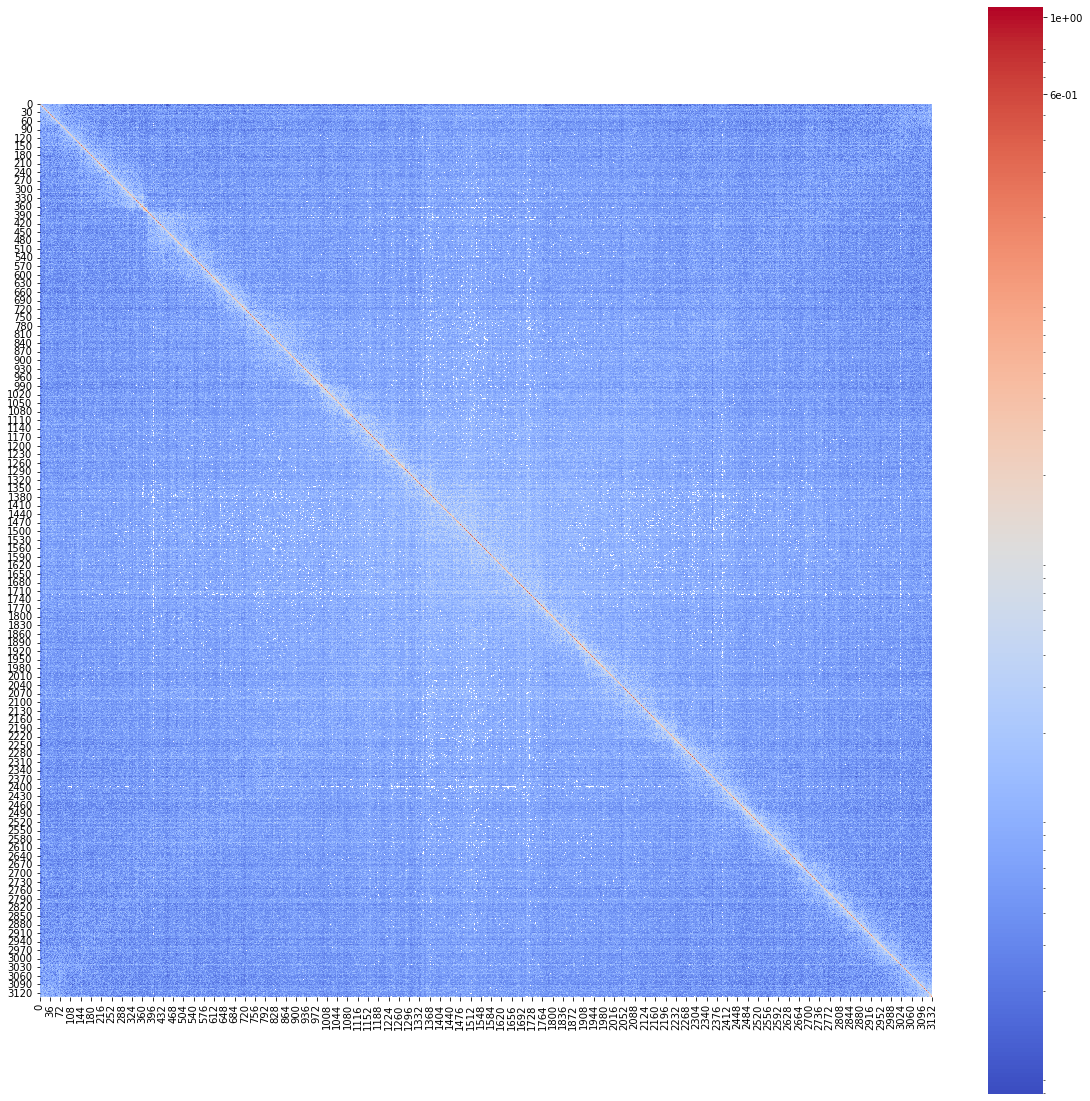

In [ ]:
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(m,
            square=True,
            norm=LogNorm(),
            cmap='coolwarm',
            cbar_kws={'ticks':MaxNLocator(2), 'format':'%.e'})

In [ ]:
# Некорректированная
m2=c.matrix(balance=False).fetch('chr1')

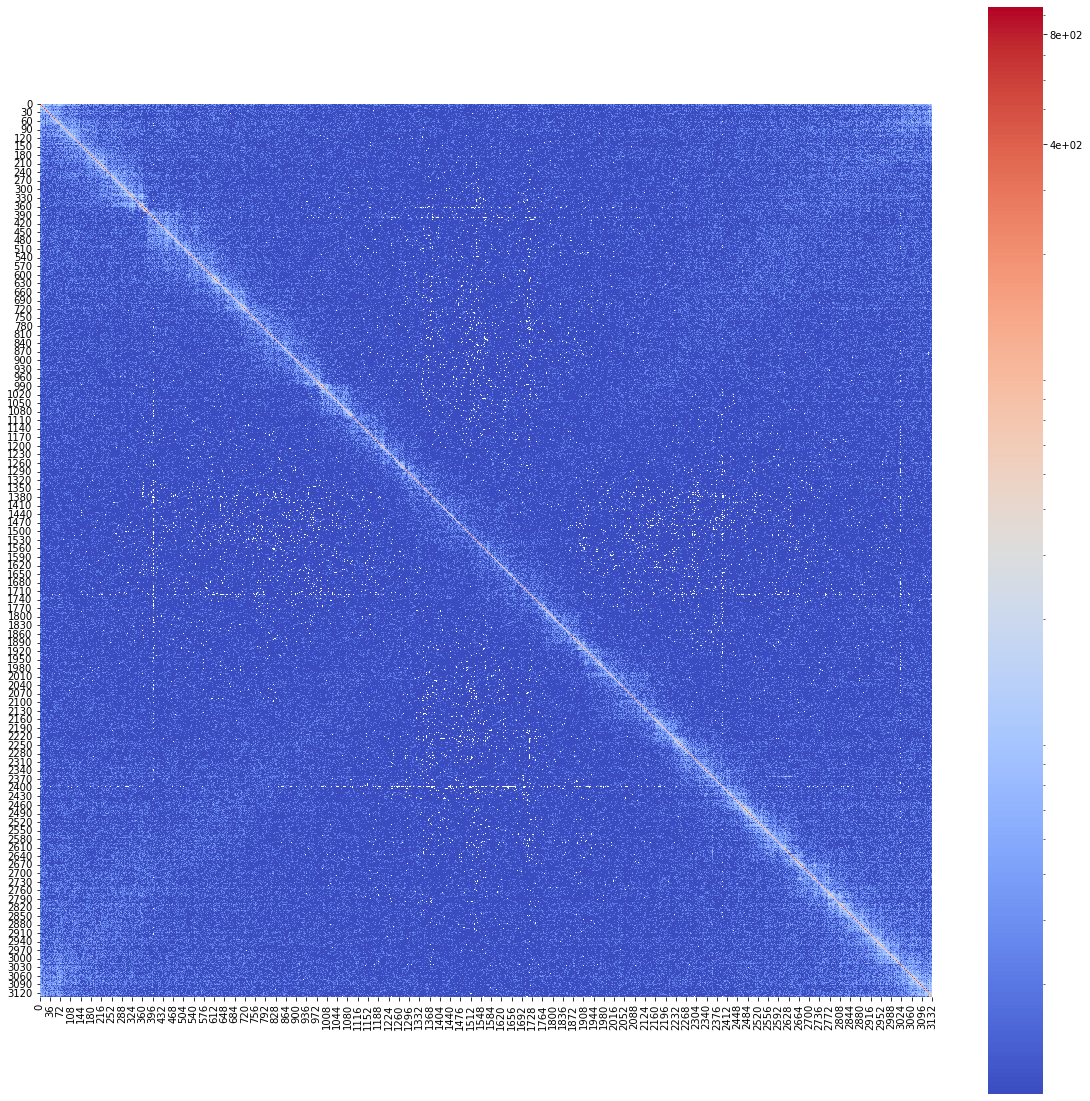

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(m2,
            square=True,
            norm=LogNorm(),
            cmap='coolwarm',
            cbar_kws={'ticks':MaxNLocator(2), 'format':'%.e'})

Некорретированный heatmap более четкий, областей контактов немного. <br>
На скорректированном heatmap видно большее количество контактов. В частности, выделяются контакты в центре хромосомы (крест по середине heatmap). Кроме того, по карте контаков видно, что структура достаточно плотная (плотней, чем у эукариот).


Part II: TADs and calling

In [ ]:
%%bash
pip install cooltools
pip3 install mustache-hic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cooltools-0.5.2.tar.gz (8.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 109.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 105.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 106.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip uninstall numpy

Found existing installation: numpy 1.21.6
Uninstalling numpy-1.21.6:
  Would remove:
    /usr/bin/f2py
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.8
    /usr/local/lib/python3.8/dist-packages/numpy-1.21.6.dist-info/*
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libopenblasp-r0-2d23e62b.3.17.so
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.8/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.21.6


In [ ]:
!pip install numpy==1.23.3

In [ ]:
import numpy as np

In [ ]:
np.__version__

'1.23.3'

In [ ]:
import cooltools
from cooltools import insulation
import cooltools.lib.plotting
#import numpy as np

In [ ]:
mcool='HiC_hESC_merged.hg38.mapq_30.10000.mcool'

Boundaries calling

In [ ]:
resolution = 40000
clr = cooler.Cooler(f'{mcool}::resolutions/{resolution}')

In [ ]:
windows = [3*resolution, 5*resolution, 10*resolution]
insulation_table = insulation(clr, windows, verbose=True)

INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chrX
INFO:root:Processing region chrY
INFO:root:Processing region chrM


In [ ]:
def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    import itertools
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)


In [ ]:
from matplotlib.colors import LogNorm

In [ ]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

(13500000.0, 19500000.0)

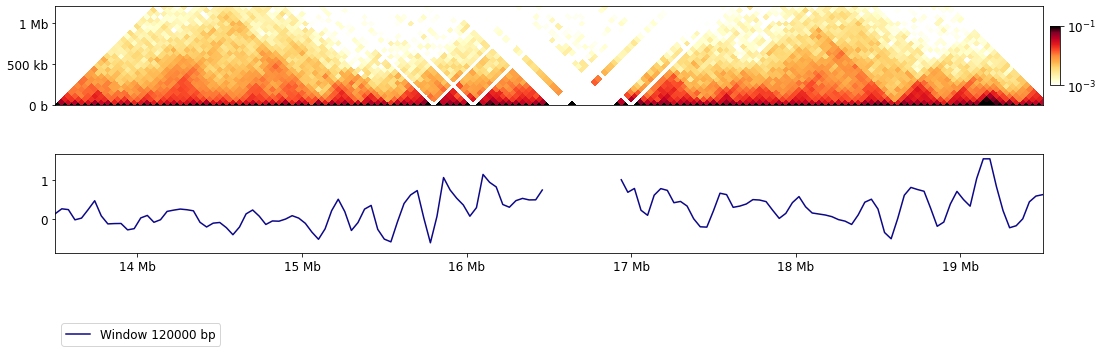

In [ ]:
plt.rcParams['font.size'] = 12

start = 13_500_000
end = start+ 50*windows[0]
region = ('chr1', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = clr.matrix(balance=True).fetch(region)
f, ax = plt.subplots(figsize=(18, 6))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region['log2_insulation_score_'+str(windows[0])],
            label=f'Window {windows[0]} bp')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

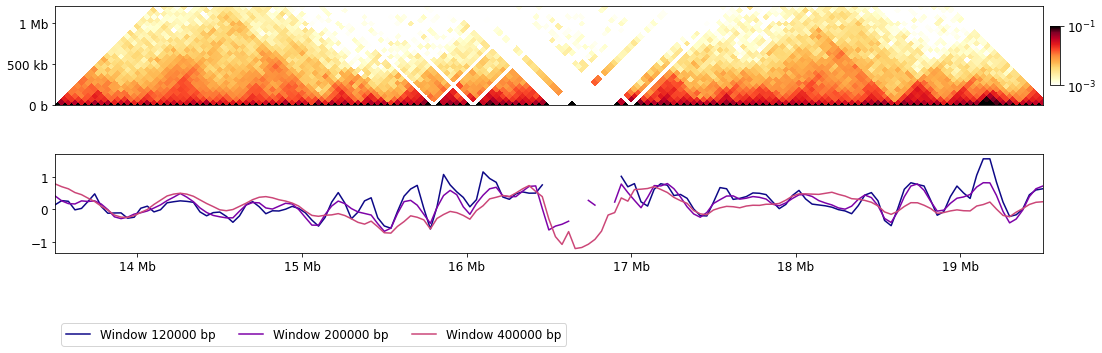

In [ ]:
for res in windows[1:]:
    ins_ax.plot(insul_region[['start', 'end']].mean(axis=1), insul_region[f'log2_insulation_score_{res}'], label=f'Window {res} bp')
ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);
f

(13500000.0, 19500000.0)

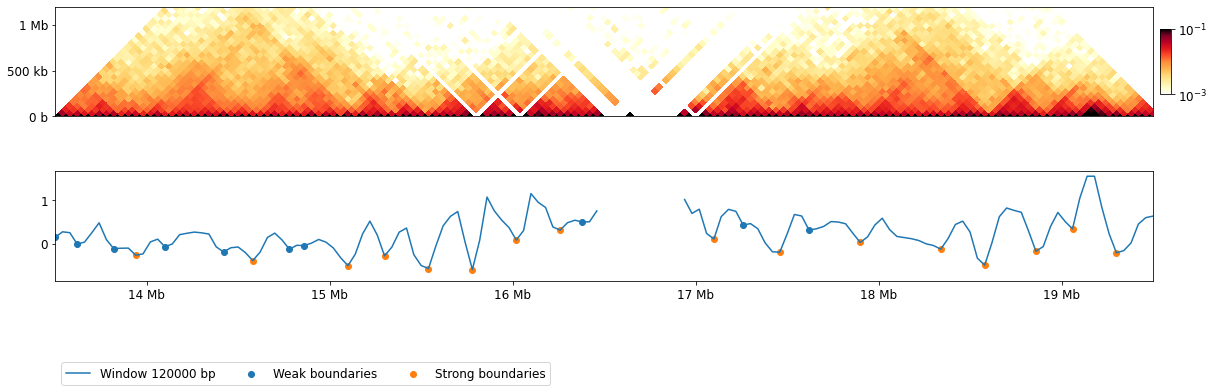

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[0]}']]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
            weak_boundaries[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

* Окно размером 400 тысяч bp не позволяет выделить границы TAD-ов, график Insulation score также очень смазанный. Окна размером 120 и 200 тысяч bp близуи между собой, я юы выбрала окно 120 на тысяч bp, так как граница в районе ~19mb кажется правдоподобной и определяется как раз только окном 120 тысяч bp.
* Слабые границы по моему мнению включать не стоит, большинство из них являются "локальными минимумами".

PART III: loops calling

In [ ]:
resolution = 20000
clr = cooler.Cooler(f'{mcool}::resolutions/{resolution}')

In [ ]:
hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
hg38_cens = bioframe.fetch_centromeres('hg38')
hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)

# Select only chromosomes that are present in the cooler.
hg38_arms = hg38_arms.set_index("chrom").loc[['chr1']].reset_index()

# intra-arm expected
expected = cooltools.expected_cis(
    clr,
    view_df=hg38_arms,
    nproc=4,
)

In [ ]:
dots_df = cooltools.dots(
    clr,
    expected=expected,
    view_df=hg38_arms,
    # how far from the main diagonal to call dots:
    max_loci_separation=10_000_000,
    nproc=4,
)

In [ ]:
! mustache -f '/content/drive/MyDrive/data_for_HiC_HSE/HiC_hESC_merged.hg38.mapq_30.10000.mcool' -ch chr1 -r 20kb -pt 0.05 -o cooler_mustache_dots.tsv




The distance limit is set to 4000000bp
Reading contact map...
0 40000000
36000000 76000000
72000000 112000000
108000000 148000000
144000000 184000000
180000000 220000000
216000000 248956421
Normalizing contact map...
Loop calling...
Starting block 1/7...
Starting block 2/7...
Starting block 3/7...
Starting block 4/7...
Block 4 done.
Block 3 done.
Block 1 done.
Block 2 done.
Starting block 5/7...
Starting block 6/7...
Starting block 7/7...
Block 6 done.
Block 5 done.
Block 7 done.
77 loops found for chrmosome=chr1, fdr<0.05 in 85.17sec
